# Molecular Visualization with GGMolVis

This notebook provides some basic usage examples of the GGMolVis library.

Currently, they are proof of concept examples and are subject to change (and implement) in the future.

Please refer to the Installation guide for instructions on how to install the library.

In [1]:
import MDAnalysis as mda
from ggmolvis.tests.data import PSF, DCD
from MDAnalysis.analysis.rms import RMSD

import molecularnodes as mn
import numpy as np
import bpy

import ggmolvis
from ggmolvis.ggmolvis import GGMolVis

2025-03-19 21:43:21.073 | DEBUG    | ggmolvis:<module>:50 - Blend file stored at /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/ggmolvis.blend
2025-03-19 21:43:21.151 | DEBUG    | ggmolvis.ggmolvis:__new__:87 - Creating new GGMolVis


In [ ]:
print(f'ggmolvis version: {ggmolvis.__version__}')
print(f'ggmolvis path: {ggmolvis.__file__}')
print(f'molecularnodes version: {mn.__file__}')

## Trajectory Visualization

Load the trajectory file by creating a MDAnalysis Universe object.
Replace `PSF` to your own topology file and `DCD` to your own trajectory file.

In [3]:
u = mda.Universe(PSF, DCD)

/Applications/Blender.app/Contents/Resources/4.3/python/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


You can apply any native Transformation in MDAnalysis to smooth the trajectory or correct periodic boundary condition (PBC) issues. For more details, refer to the [MDAnalysis trajectory transformations documentation](https://docs.mdanalysis.org/stable/documentation_pages/trajectory_transformations.html).

Here, we add a smoothing transformation to the trajectory.

In [4]:
from MDAnalysis.transformations import PositionAverager
N=5
transformation = PositionAverager(N, check_reset=True)
u.trajectory.add_transformations(transformation)

Initialize the GGMolVis object. It can be thought of as a `Figure` or a canvas for the molecular visualization.

In [5]:
ggmv = GGMolVis()

Select molecular entities of interest to be visualized. Refer to: https://docs.mdanalysis.org/stable/documentation_pages/selections.html for the selection syntax.

In [6]:
residues_ag = u.select_atoms('resid 127 40')
protein_ag = u.select_atoms('protein')
around_res = u.select_atoms('byres around 6 resid 40', updating=True)

Here we include our molecules into the `GGMolVis` object by calling the `trajectory` method.

In [ ]:
residue_mol = ggmv.trajectory(residues_ag)
residue_around_mol = ggmv.trajectory(around_res, style='ball_and_stick')
protein_mol = ggmv.trajectory(protein_ag, style='cartoon')
protein_surface_mol = ggmv.trajectory(protein_ag, style='surface', material='transparent')

Render the current frame by calling the `render` method.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpsps5m1i9.PNG
Read blend: "/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/ggmolvis.blend"
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpsps5m1i9.PNG'
Time: 00:05.74 (Saving: 00:00.07)



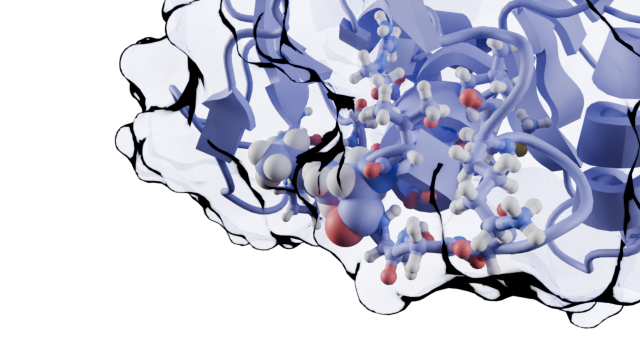

In [7]:
ggmv.render(residue_mol)

Render the selected frame by calling the `render(frame)` method.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpck8ivtua.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpck8ivtua.PNG'
Time: 00:04.44 (Saving: 00:00.01)



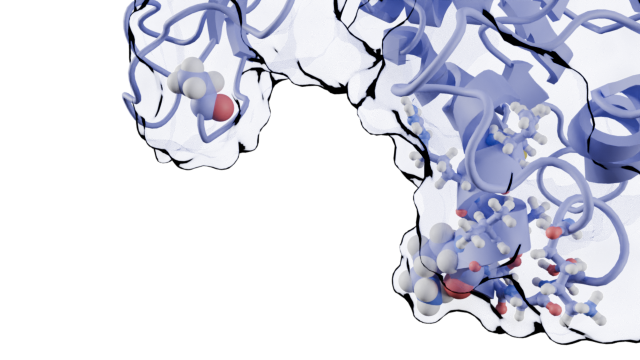

In [8]:
ggmv.render(residue_mol, frame=60)

You can render the whole trajectory by calling the `.render(frame_range=(start, stop, step))` method.

In [ ]:
ggmv.render(residue_mol, frame_range=(0, 30, 1))

You can track the object by calling the `.render(track=True)` method.

In [ ]:
ggmv.render(residue_mol, frame_range=(0, 60, 6), track=True)

You can change the representation style by calling `set_style` method.

In [9]:
residue_mol.set_style('ball_and_stick')

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpx3hhqtzn.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpx3hhqtzn.PNG'
Time: 00:04.44 (Saving: 00:00.01)



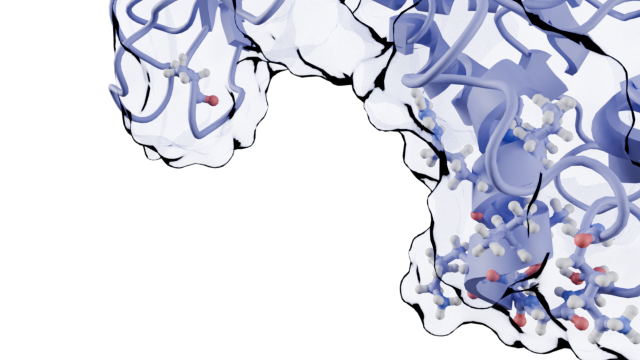

In [10]:
ggmv.render(residue_mol)

Each trajectory has a unique camera view pointing to the center of it. There is also a global camera view. You can render it by calling `render` without object.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmplpt8euow.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmplpt8euow.PNG'
Time: 00:02.28 (Saving: 00:00.01)



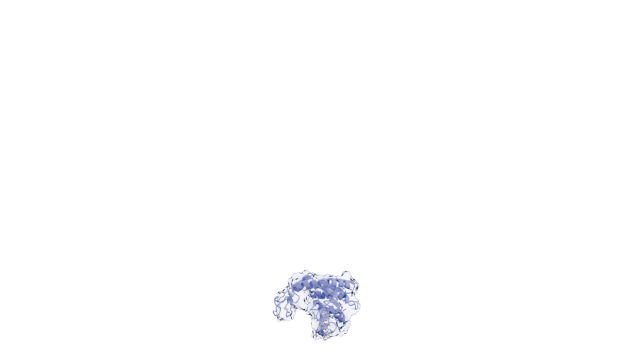

In [11]:
ggmv.render()

Change focal lens by setting `lens` attribute.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpvcvreus7.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpvcvreus7.PNG'
Time: 00:03.70 (Saving: 00:00.01)



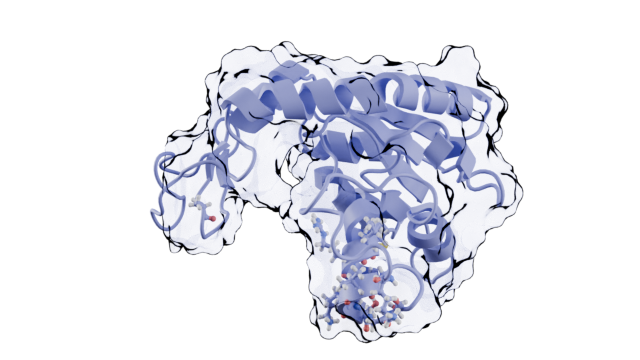

In [12]:
ggmv.render(protein_mol,lens=50)

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp8fnshimm.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp8fnshimm.PNG'
Time: 00:02.50 (Saving: 00:00.01)



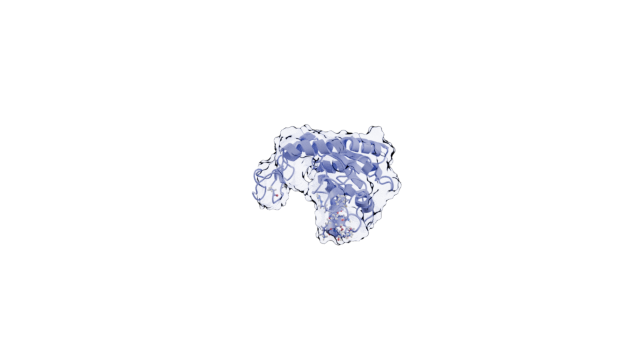

In [13]:
ggmv.render(protein_mol, lens=20)

Alternatively, GGMolVis also provides a `visualize` method to `AtomGroup`.

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpjdimkagk.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpjdimkagk.PNG'
Time: 00:04.37 (Saving: 00:00.01)



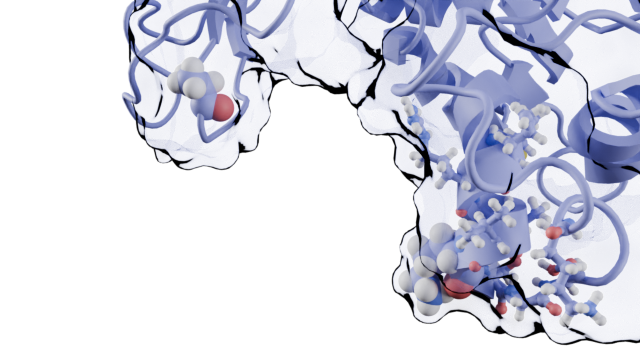

In [14]:
residues_ag.visualize()

## Geometric feature Visualization

Visualize simple geometric features, e.g. distance can be done by calling the `distance` method.

In [7]:
res_1 = residues_ag.residues[0].atoms
res_2 = residues_ag.residues[1].atoms
mol_atoms, line = ggmv.distance(res_1, res_2)

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpoiel3mpb.PNG
Read blend: "/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/ggmolvis.blend"
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmpoiel3mpb.PNG'
Time: 00:01.58 (Saving: 00:00.06)



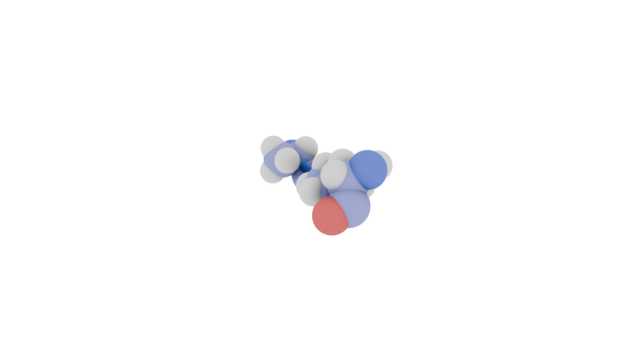

In [8]:
ggmv.render(mol_atoms, frame=0)

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp6630eikd.PNG
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp6630eikd.PNG'
Time: 00:01.35 (Saving: 00:00.00)



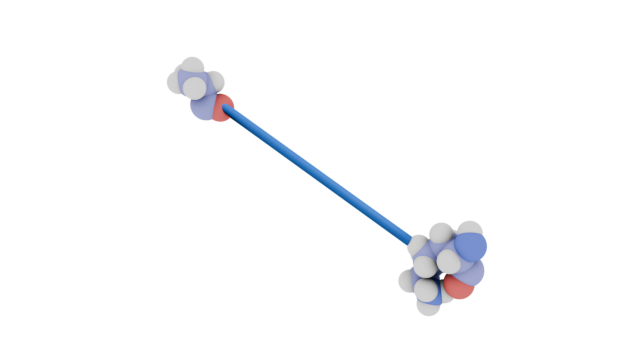

In [9]:
ggmv.render(mol_atoms, frame=60)

## Analysis Visualization

In [6]:
rmsd = RMSD(u.select_atoms('name CA'))
rmsd.run()

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp6mphda50.PNG
Read blend: "/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/ggmolvis.blend"
Saved: '/var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp6mphda50.PNG'
Time: 00:02.58 (Saving: 00:00.06)



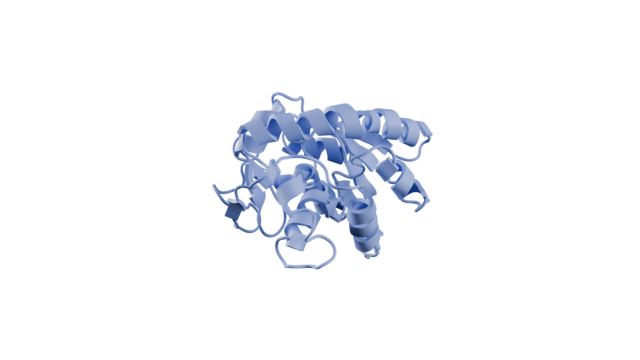

In [7]:
vis = rmsd.visualize()

In [8]:
ggmv.render(vis, mode='movie', frame_range=(0, 60, 6))

Rendering to: /var/folders/fn/_k4nj2nd6zv85t7_r3417nb40000gn/T/tmp8cpq1wmh.mp4
Append frame 0
Time: 00:02.28 (Saving: 00:00.00)

Append frame 6
Time: 00:02.19 (Saving: 00:00.00)

Append frame 12
Time: 00:02.13 (Saving: 00:00.00)

Append frame 18
Time: 00:02.06 (Saving: 00:00.00)

Append frame 24
Time: 00:02.08 (Saving: 00:00.00)

Append frame 30
Time: 00:02.02 (Saving: 00:00.00)

Append frame 36
Time: 00:02.02 (Saving: 00:00.00)

Append frame 42
Time: 00:02.03 (Saving: 00:00.00)

Append frame 48
Time: 00:02.05 (Saving: 00:00.00)

Append frame 54
Time: 00:02.02 (Saving: 00:00.00)

Append frame 60
Time: 00:02.05 (Saving: 00:00.00)

